In [ ]:
import matplotlib.pylab as pl
%matplotlib inline

import cPickle as pickle

experiment settings<br>
</p>
batch size: 128<br>
epochs: 300<br>
learning rate: 0.1<br>
learning rate decay: none<br>
optimizer: SGD<br>
regularization: none<br>
test data: 10000 images<br>
training data: 40000 images<br>
units each hidden layer: 1024<br>
validation data: 10000 images<br>

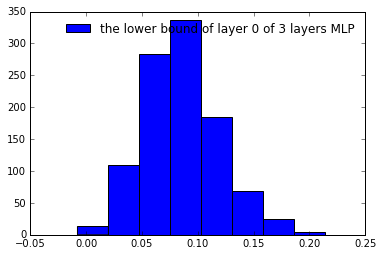

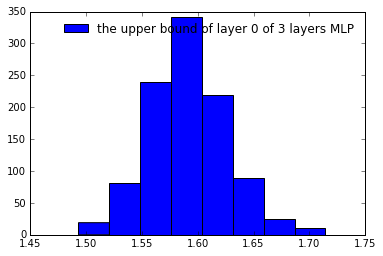

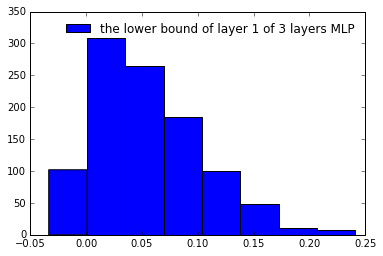

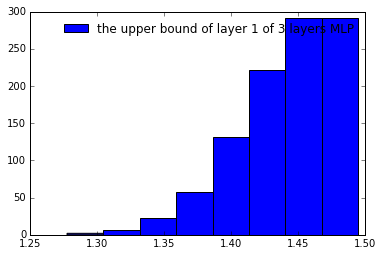

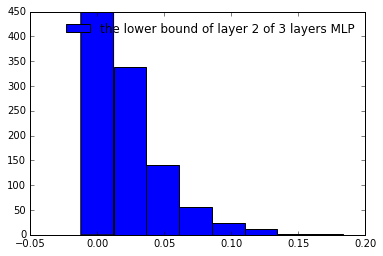

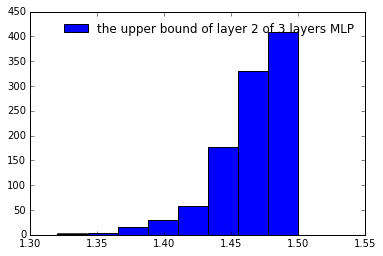

In [ ]:
bins = 8
activation = 'NDReLU'
for depth in range(3, 11):
    shape = (1024,) * depth + (10,)
    path = ('../../models/CIFAR-%s10-%s-parameters' % ('{}-' * (len(shape) - 1), activation)).format(*shape[:-1])
    parameters, _ = pickle.load(open(path, 'rb'))
    for layer in range(depth):
        lower = parameters['DReLU%d_lower' % layer].asnumpy().flatten()
        upper = parameters['DReLU%d_upper' % layer].asnumpy().flatten()
        pl.hist(lower, bins=bins, normed=False, label='the lower bound of layer %d of %d layers MLP' % (layer, depth))
        pl.legend(framealpha=0)
        pl.show()
        pl.hist(upper, bins=bins, normed=False, label='the upper bound of layer %d of %d layers MLP' % (layer, depth))
        pl.legend(framealpha=0)
        pl.show()